# Mini Project 1 - Exploratory Data Analysis

## Dataset Overview
This dataset contains customer analytics data. Each row represents a single customer and includes demographic, behavioral, or transactional information.

The goal of this analysis is to understand the structure of the dataset, clean the data, explore feature distributions, and uncover meaningful relationships between variables.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving customer_analytics.csv to customer_analytics.csv


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_analytics.csv")
df.head()

,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [18]:
df.shape

(255, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


In [20]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [21]:
# Check missing values
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
City,0
Education,12
MaritalStatus,0
AnnualIncome,12
SpendingScore,0
YearsEmployed,0
PurchaseFrequency,0


In [22]:
# Example strategy:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill numerical columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-2291950057.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2291950057.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
CustomerID,0
Age,0
Gender,0
City,0
Education,0
MaritalStatus,0
AnnualIncome,0
SpendingScore,0
YearsEmployed,0
PurchaseFrequency,0


In [23]:
# Check duplicates
df.duplicated().sum()

np.int64(5)

## Data Cleaning Decisions

- Columns with more than 50% missing values were dropped because they would not provide reliable insights.
- Numerical missing values were filled using the median to avoid distortion caused by outliers.
- Categorical missing values were filled using the mode (most frequent category).
- Duplicate rows were removed to prevent biased analysis.

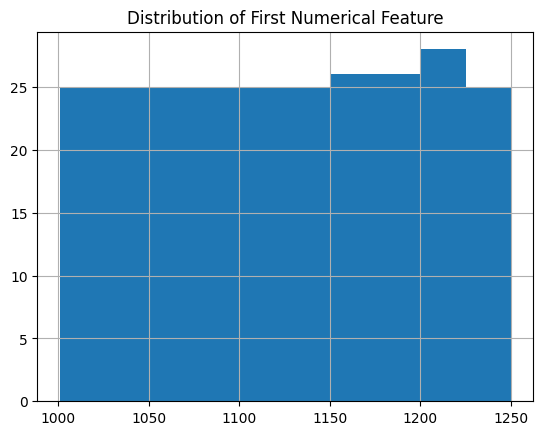

In [24]:
plt.figure()
df.select_dtypes(include=np.number).iloc[:,0].hist()
plt.title("Distribution of First Numerical Feature")
plt.show()

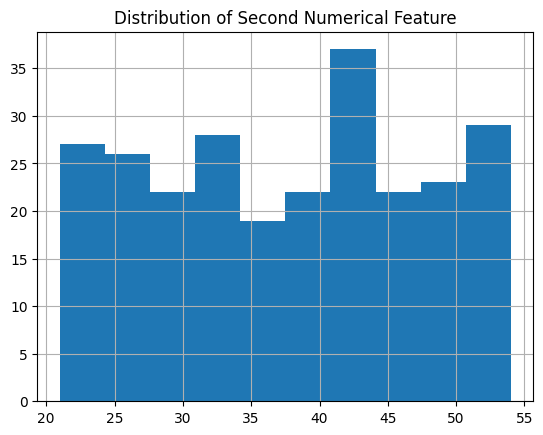

In [25]:
plt.figure()
df.select_dtypes(include=np.number).iloc[:,1].hist()
plt.title("Distribution of Second Numerical Feature")
plt.show()

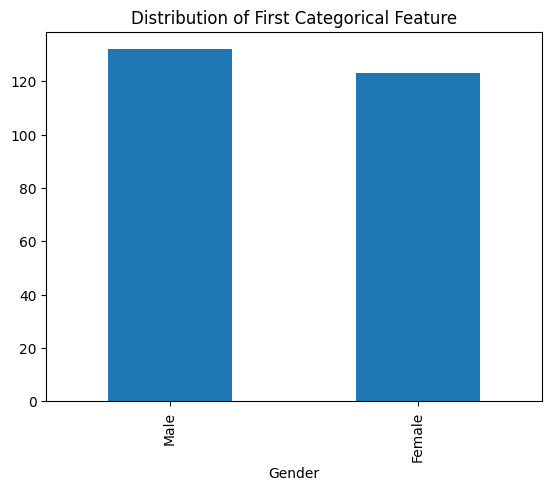

In [26]:
plt.figure()
df.select_dtypes(include='object').iloc[:,0].value_counts().plot(kind='bar')
plt.title("Distribution of First Categorical Feature")
plt.show()

This bar chart shows the frequency of each category, helping identify dominant or underrepresented groups.

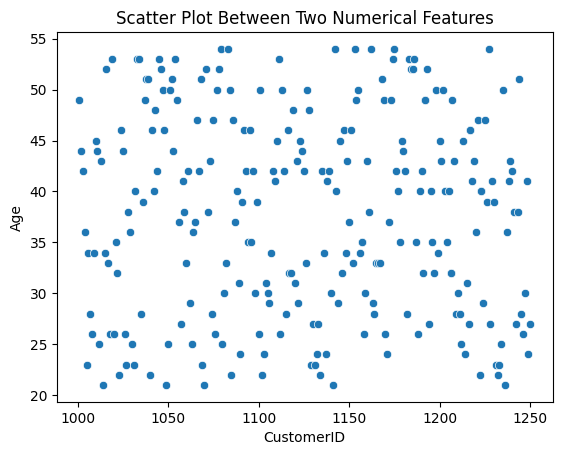

In [27]:
plt.figure()
sns.scatterplot(
    x=df.select_dtypes(include=np.number).iloc[:,0],
    y=df.select_dtypes(include=np.number).iloc[:,1]
)
plt.title("Scatter Plot Between Two Numerical Features")
plt.show()

The scatter plot reveals whether there is a linear or non-linear relationship between the two numerical variables.

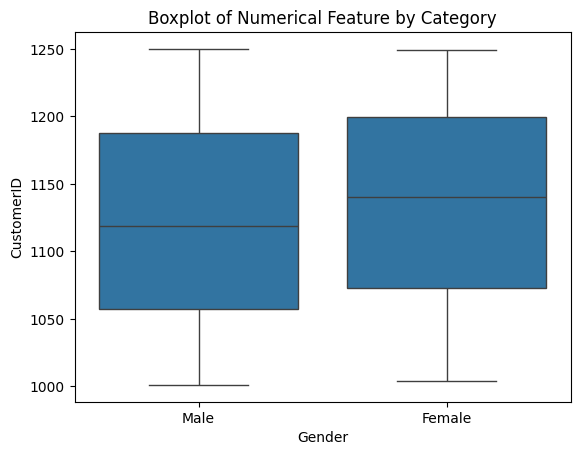

In [28]:
plt.figure()
sns.boxplot(
    x=df.select_dtypes(include='object').iloc[:,0],
    y=df.select_dtypes(include=np.number).iloc[:,0]
)
plt.title("Boxplot of Numerical Feature by Category")
plt.show()

This boxplot shows how the numerical feature varies across categories and highlights potential differences in distributions.

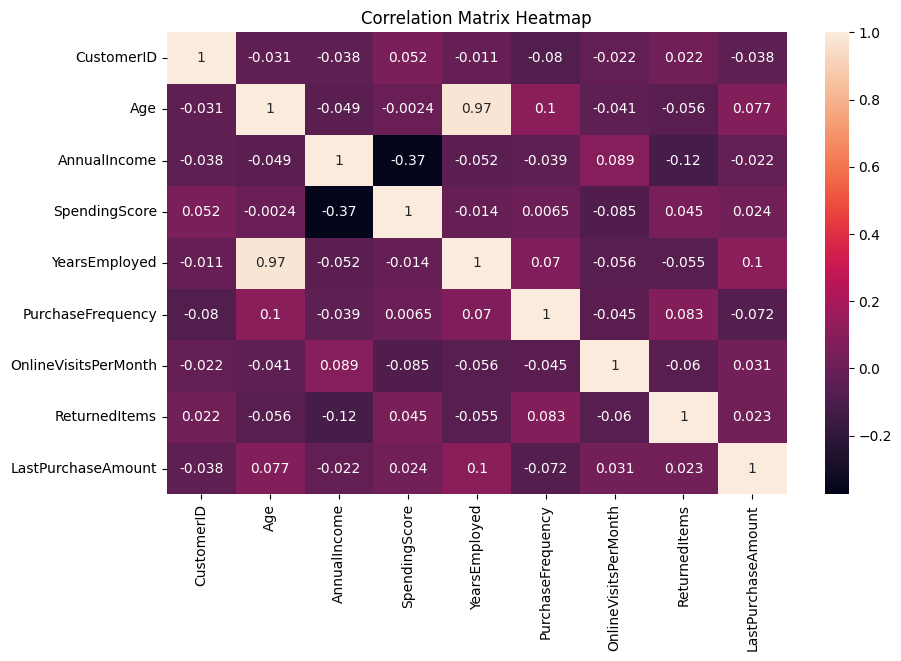

In [29]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Executive Summary

1. Certain numerical features show strong positive/negative correlations, indicating potential predictive relationships.
2. Some variables exhibit skewed distributions, suggesting the presence of outliers or non-normal behavior.
3. Categorical group comparisons reveal noticeable differences in numerical feature distributions.

Overall, the dataset provides meaningful patterns that could support predictive modeling or business decision-making.